In [47]:
import csv

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [48]:
dataset = 'yoga_keypoint.csv'
model_save_path = 'yoga_keypoint_classifier.hdf5'
tflite_save_path = 'yoga_keypoint_classifier.tflite'

# Set number of classes

In [49]:
NUM_CLASSES = 13

# Dataset reading

In [50]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (33 * 2) + 1)))

In [51]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((33 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [54]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 66)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                1340      
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 13)                143       
                                                                 
Total params: 1,693
Trainable params: 1,693
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [56]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [57]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 5s - loss: 2.7263 - accuracy: 0.0781
Epoch 1: saving model to yoga_keypoint_classifier.hdf5
7/7 [==============================] - 1s 49ms/step - loss: 2.6151 - accuracy: 0.1213 - val_loss: 2.4687 - val_accuracy: 0.2414
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.5556 - accuracy: 0.1641
Epoch 2: saving model to yoga_keypoint_classifier.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 2.5114 - accuracy: 0.2005 - val_loss: 2.4229 - val_accuracy: 0.2490
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.5158 - accuracy: 0.1562
Epoch 3: saving model to yoga_keypoint_classifier.hdf5
7/7 [==============================] - 0s 17ms/step - loss: 2.4801 - accuracy: 0.2056 - val_loss: 2.3960 - val_accuracy: 0.2490
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.5393 - accuracy: 0.1875
Epoch 4: saving model to yoga_keypoint_classifier.hdf5
7/7 [===============

In [58]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.6897


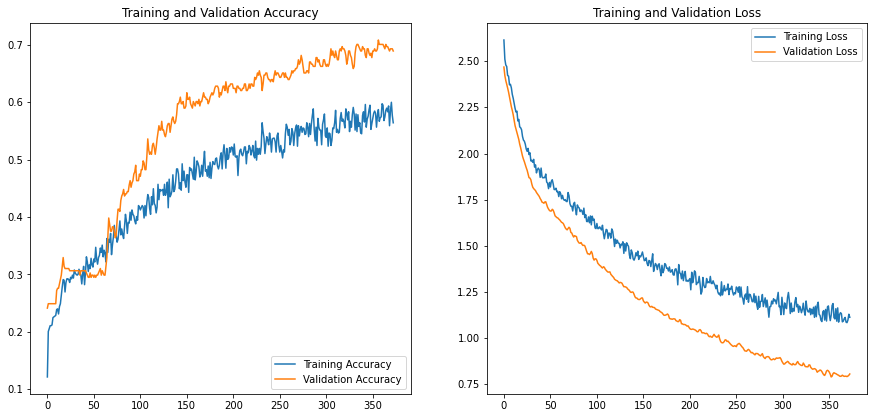

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(373)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 144ms/step
[9.71694244e-05 4.57820773e-01 7.51787722e-02 2.19536856e-01
 8.61960053e-02 6.02951907e-02 1.87459365e-02 4.83436370e-03
 5.59125794e-04 1.05609174e-03 1.15320145e-04 7.14027882e-02
 4.16161167e-03]
1


In [16]:
acc = predict_result.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'history'

# Confusion matrix

9/9 [==============================] - 0s 1ms/step


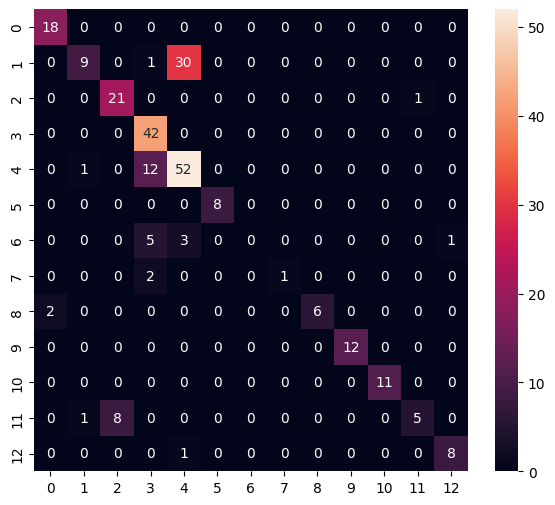

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.82      0.23      0.35        40
           2       0.72      0.95      0.82        22
           3       0.68      1.00      0.81        42
           4       0.60      0.80      0.69        65
           5       1.00      1.00      1.00         8
           6       0.00      0.00      0.00         9
           7       1.00      0.33      0.50         3
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        11
          11       0.83      0.36      0.50        14
          12       0.89      0.89      0.89         9

    accuracy                           0.74       261
   macro avg       0.80      0.72      0.72       261
weighted avg       0.74      0.74      0.70       261



c:\Users\Hardik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hardik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hardik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [23]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [24]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hardik\AppData\Local\Temp\tmpflnstjkq\assets


5000

# Inference test

In [25]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [26]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [27]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [28]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.28 ms


In [29]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0172459e-03 4.7438100e-01 4.4981759e-02 1.3737948e-01 2.4630448e-01
 2.0523589e-02 1.4754695e-02 2.4771306e-03 1.1857506e-04 1.3749826e-03
 2.6370916e-03 2.2842111e-02 3.1207878e-02]
1
